# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("sebastianwillmann/beverage-sales")

# Tambahkan nama file CSV secara langsung ke path
file_path = path + "/synthetic_beverage_sales_data.csv"

# Baca dataset
data = pd.read_csv(file_path)

# Ambil sampel acak 100.000 baris
sample_data = data.sample(n=100000, random_state=42)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
sample_data.head(10)

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
4990465,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
5995542,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
1044351,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
1802181,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
6900691,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16
5713903,ORD1905015,CUS7810,B2B,Riesling,Alcoholic Beverages,8.62,47,0.05,384.88,Bayern,2021-02-27
7916353,ORD2638652,CUS4386,B2C,Pepsi,Soft Drinks,1.74,5,0.00,8.70,Niedersachsen,2023-08-13
2410826,ORD803183,CUS7916,B2C,Hohes C Orange,Juices,1.80,15,0.00,27.00,Saarland,2022-10-06
5240982,ORD1747192,CUS7549,B2B,Havana Club,Alcoholic Beverages,30.22,57,0.10,1550.29,Bayern,2023-03-16
5008990,ORD1669739,CUS3794,B2B,Vio Wasser,Water,0.98,6,0.05,5.59,Niedersachsen,2021-09-20


In [4]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 4990465 to 1950082
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Order_ID       100000 non-null  object 
 1   Customer_ID    100000 non-null  object 
 2   Customer_Type  100000 non-null  object 
 3   Product        100000 non-null  object 
 4   Category       100000 non-null  object 
 5   Unit_Price     100000 non-null  float64
 6   Quantity       100000 non-null  int64  
 7   Discount       100000 non-null  float64
 8   Total_Price    100000 non-null  float64
 9   Region         100000 non-null  object 
 10  Order_Date     100000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 11.2+ MB


In [5]:
sample_data.describe(include="all")

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
count,100000,100000,100000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000
unique,98479,10000,2,47,4,NaN,NaN,NaN,NaN,16,1094
top,ORD1067758,CUS7320,B2C,Hohes C Orange,Alcoholic Beverages,NaN,NaN,NaN,NaN,Hamburg,2023-09-01
freq,3,24,64348,3821,25246,NaN,NaN,NaN,NaN,6787,135
mean,NaN,NaN,NaN,NaN,NaN,5.865283,23.108880,0.029747,132.272376,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.800602,26.874866,0.044783,514.937111,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.320000,1.000000,0.000000,0.310000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.050000,6.000000,0.000000,8.400000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.750000,11.000000,0.000000,21.110000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3.210000,30.000000,0.050000,69.990000,NaN,NaN


In [6]:
missing_values = sample_data.isnull().sum()
missing_values[missing_values > 0]

,0


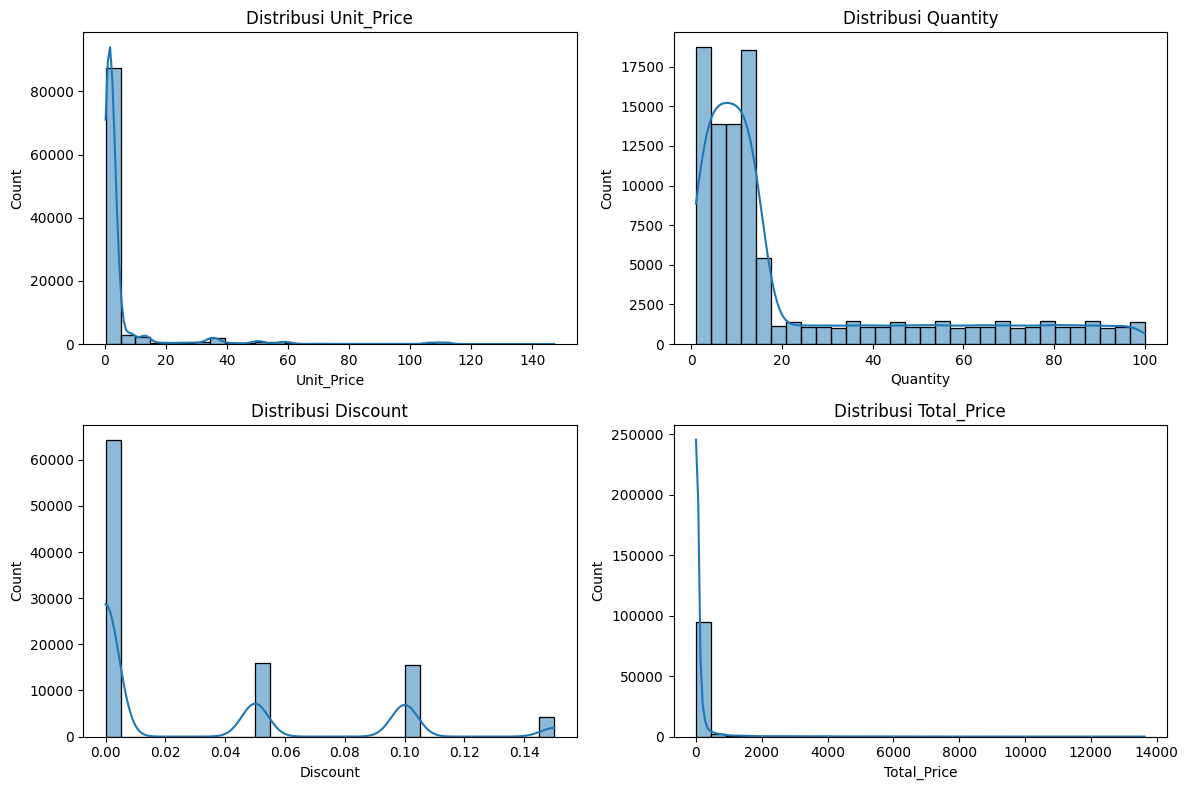

In [7]:
num_cols = sample_data.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(sample_data[col], bins=30, kde=True)
    plt.title(f"Distribusi {col}")
plt.tight_layout()
plt.show()

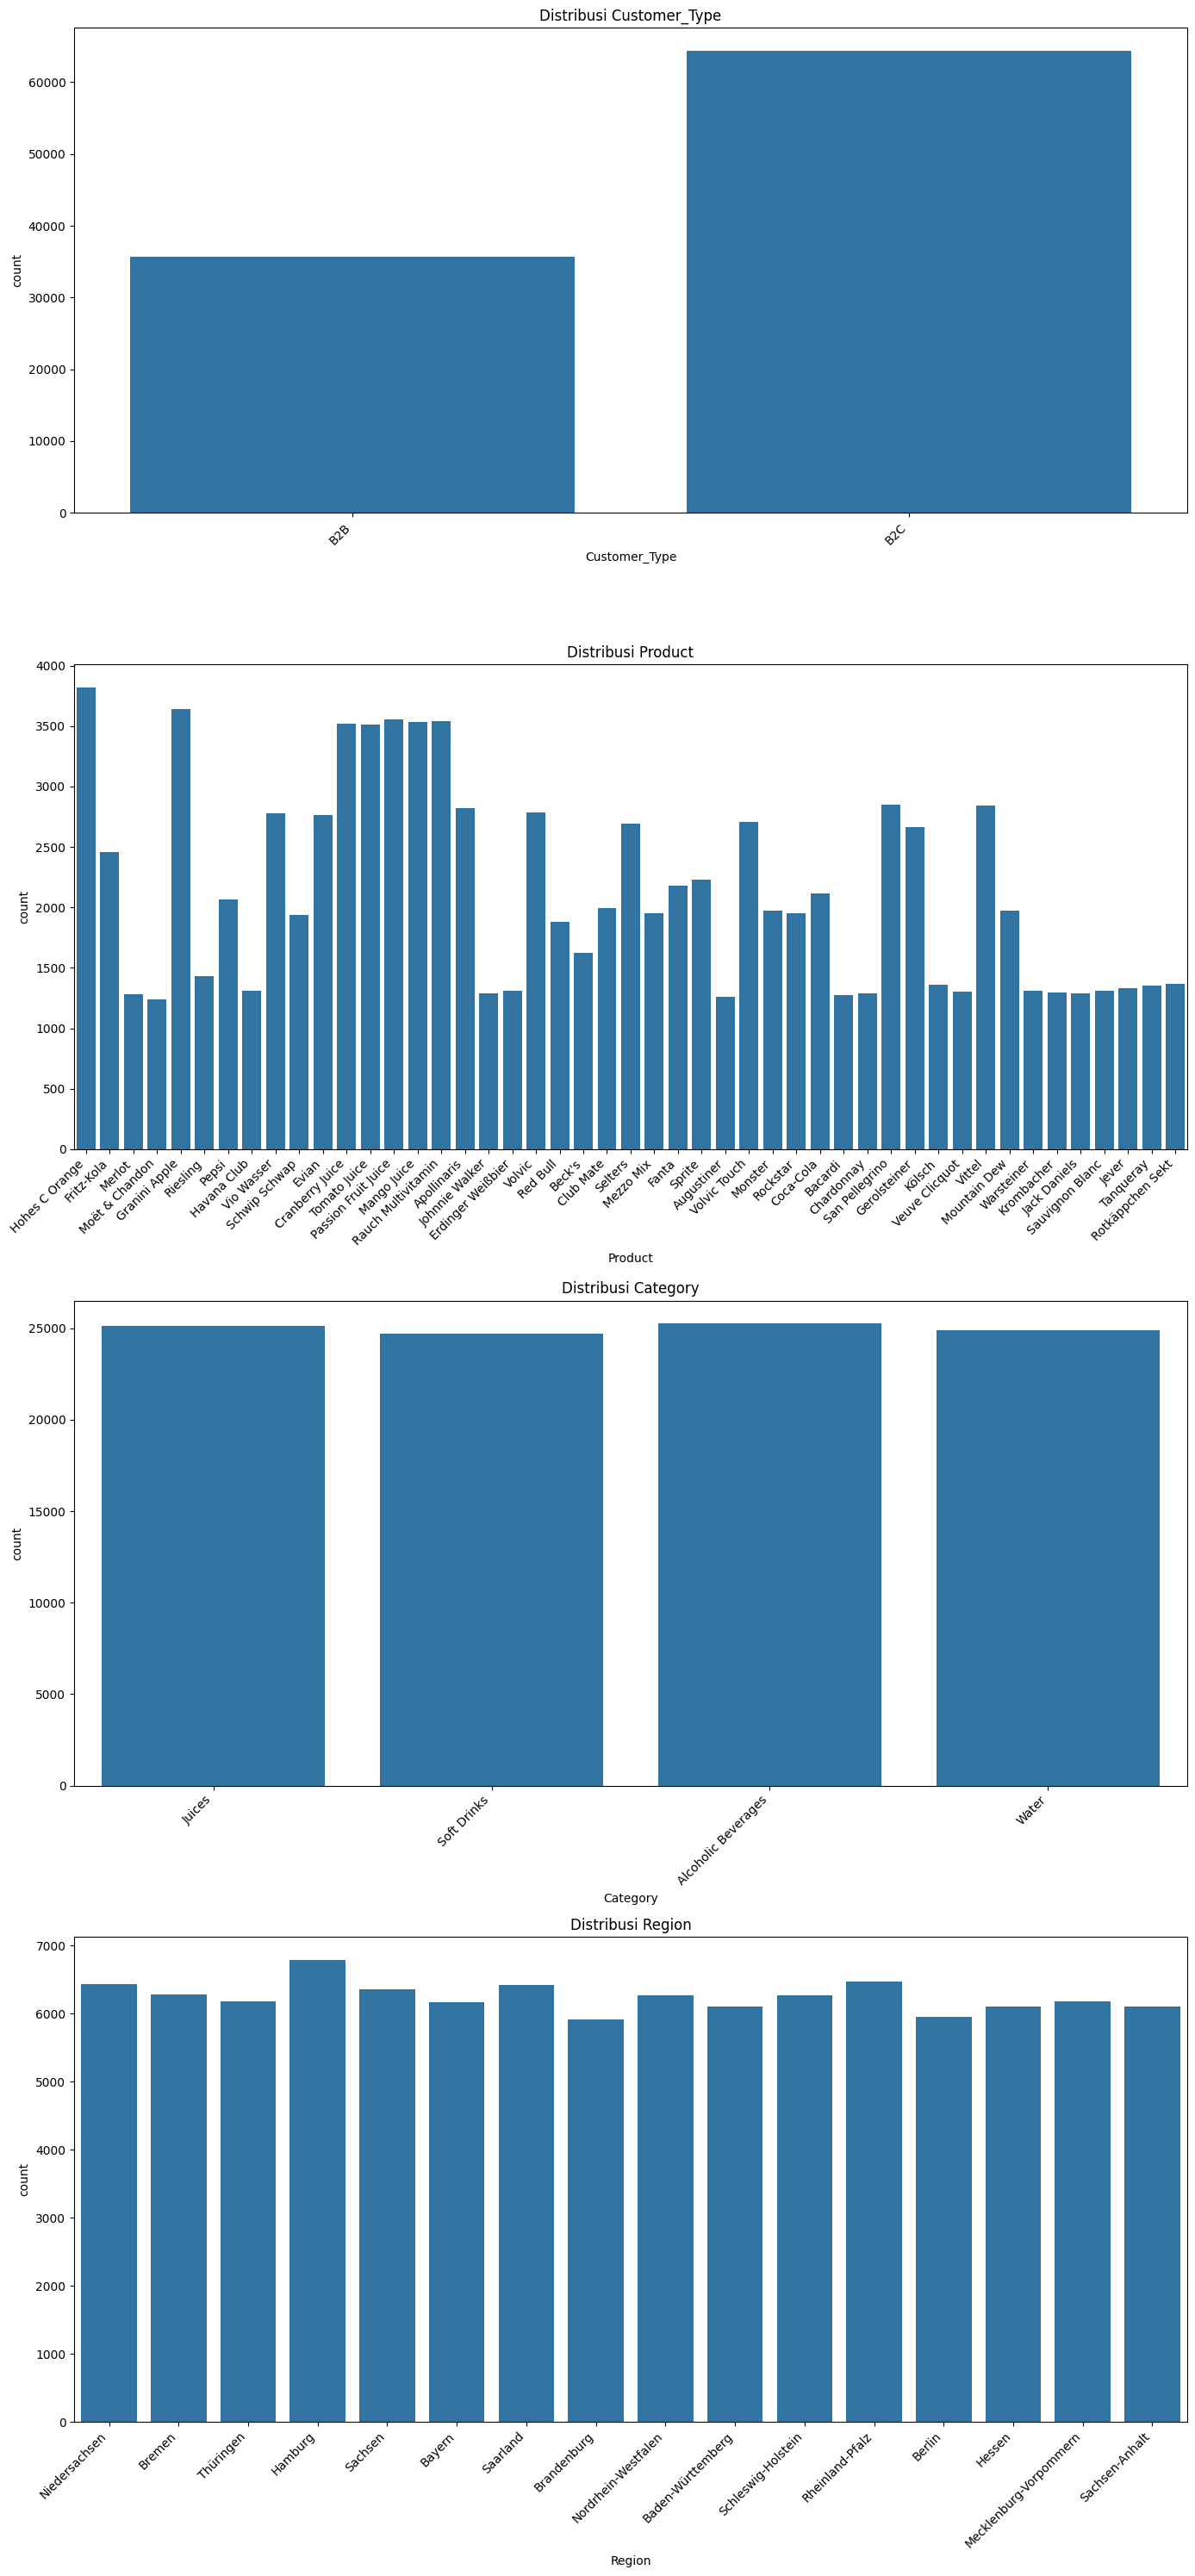

In [8]:
cat_cols = ['Customer_Type', 'Product', 'Category', 'Region']
plt.figure(figsize=(14, 30))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 1, i)
    sns.countplot(x=sample_data[col])
    plt.title(f"Distribusi {col}")
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [9]:
# Jumlah produk unik
print("Jumlah Tipe Customer:", sample_data['Customer_Type'].nunique())
print("Jumlah Produk:", sample_data['Product'].nunique())
print("Jumlah Kategori:", sample_data['Category'].nunique())
print("Jumlah Region:", sample_data['Region'].nunique())

Jumlah Tipe Customer: 2
Jumlah Produk: 47
Jumlah Kategori: 4
Jumlah Region: 16


In [10]:
# Urutan produk dari yang paling sering muncul
product_counts = sample_data['Product'].value_counts()
print(product_counts)

Product
Hohes C Orange         3821
Granini Apple          3639
Passion Fruit Juice    3557
Rauch Multivitamin     3543
Mango Juice            3534
Cranberry Juice        3522
Tomato Juice           3513
San Pellegrino         2849
Vittel                 2844
Apollinaris            2819
Volvic                 2788
Vio Wasser             2781
Evian                  2763
Volvic Touch           2705
Selters                2694
Gerolsteiner           2666
Fritz-Kola             2457
Sprite                 2228
Fanta                  2179
Coca-Cola              2118
Pepsi                  2067
Club Mate              1995
Mountain Dew           1972
Monster                1971
Rockstar               1953
Mezzo Mix              1953
Schwip Schwap          1941
Red Bull               1882
Beck's                 1624
Riesling               1432
Rotkäppchen Sekt       1367
Kölsch                 1362
Tanqueray              1355
Jever                  1334
Sauvignon Blanc        1314
Havana Club 

In [11]:
region_counts = sample_data['Region'].value_counts()
print(region_counts)

Region
Hamburg                   6787
Rheinland-Pfalz           6472
Niedersachsen             6432
Saarland                  6421
Sachsen                   6363
Bremen                    6285
Schleswig-Holstein        6267
Nordrhein-Westfalen       6263
Mecklenburg-Vorpommern    6183
Thüringen                 6180
Bayern                    6167
Sachsen-Anhalt            6109
Hessen                    6106
Baden-Württemberg         6106
Berlin                    5950
Brandenburg               5909
Name: count, dtype: int64


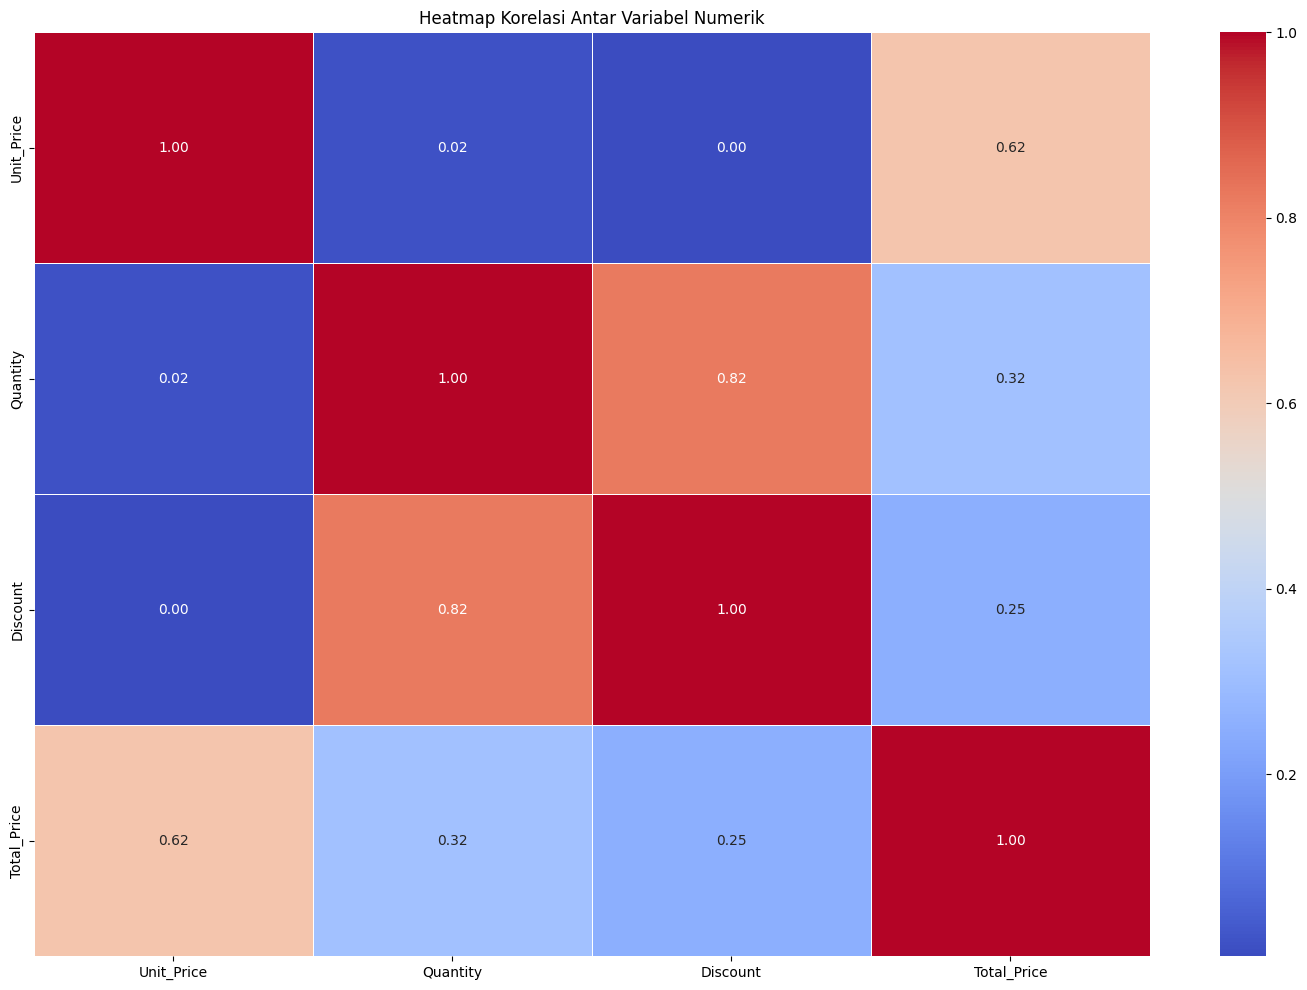

In [12]:
correlation = sample_data[num_cols].corr()
plt.figure(figsize=(18, 12))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()

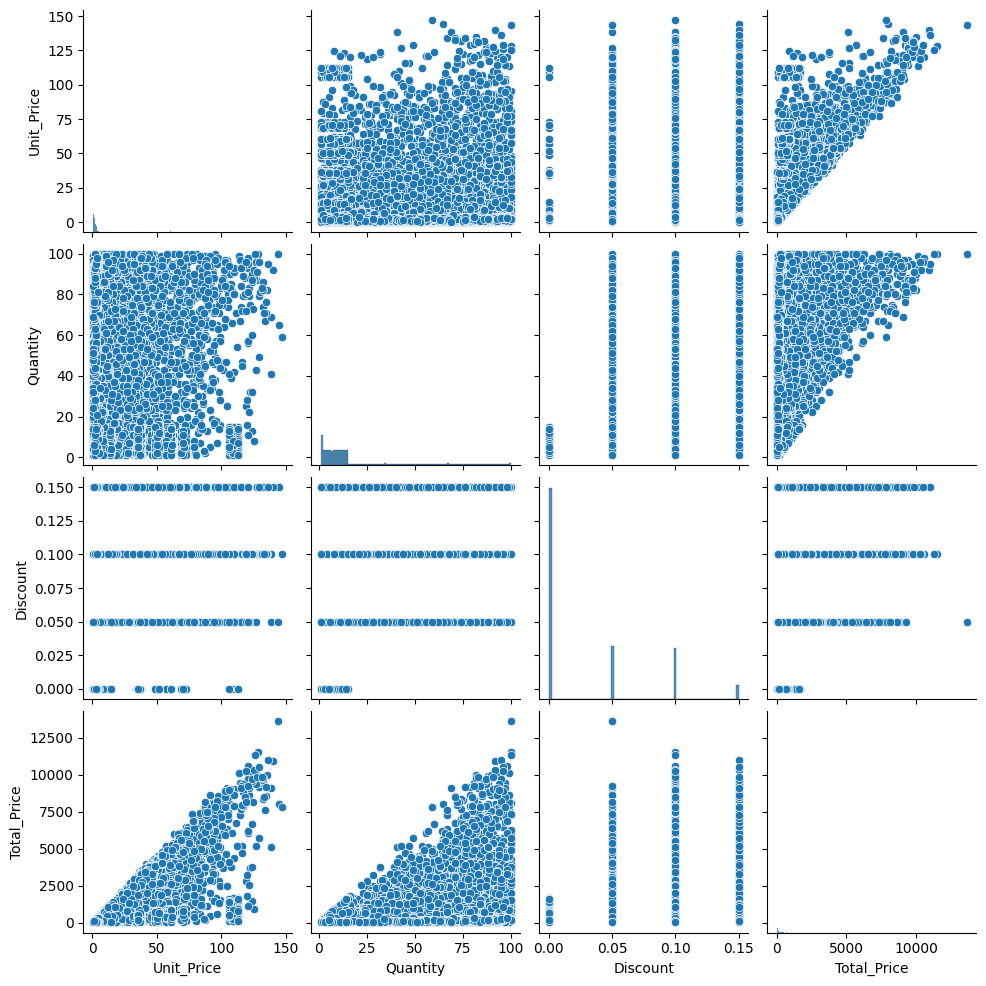

In [13]:
sns.pairplot(sample_data[num_cols])
plt.show()

In [14]:
datetime_columns = ["Order_Date"]
sample_data[datetime_columns] = sample_data[datetime_columns].apply(pd.to_datetime, format="%Y-%m-%d")

In [15]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 4990465 to 1950082
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Order_ID       100000 non-null  object        
 1   Customer_ID    100000 non-null  object        
 2   Customer_Type  100000 non-null  object        
 3   Product        100000 non-null  object        
 4   Category       100000 non-null  object        
 5   Unit_Price     100000 non-null  float64       
 6   Quantity       100000 non-null  int64         
 7   Discount       100000 non-null  float64       
 8   Total_Price    100000 non-null  float64       
 9   Region         100000 non-null  object        
 10  Order_Date     100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 11.2+ MB


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [16]:
missing_values = sample_data.isnull().sum()
missing_values[missing_values > 0]

,0


In [17]:
duplicates = sample_data.duplicated()

print("Baris duplikat:")
print(sample_data[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [Order_ID, Customer_ID, Customer_Type, Product, Category, Unit_Price, Quantity, Discount, Total_Price, Region, Order_Date]
Index: []


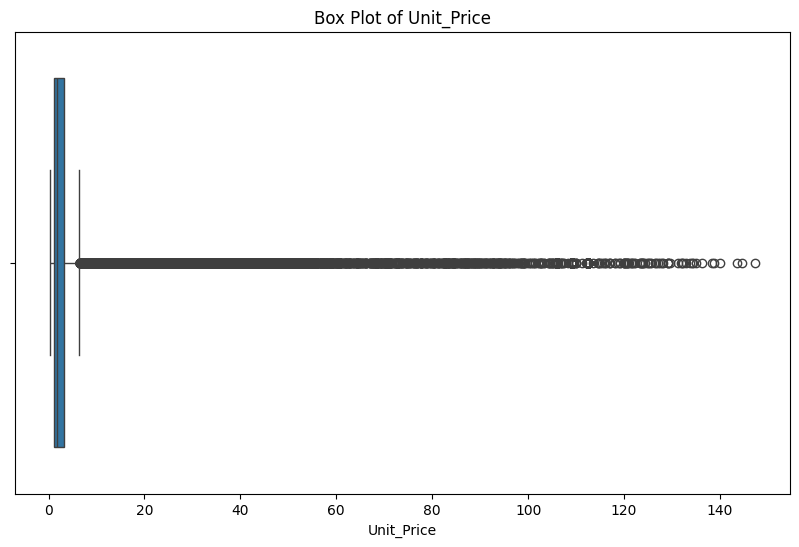

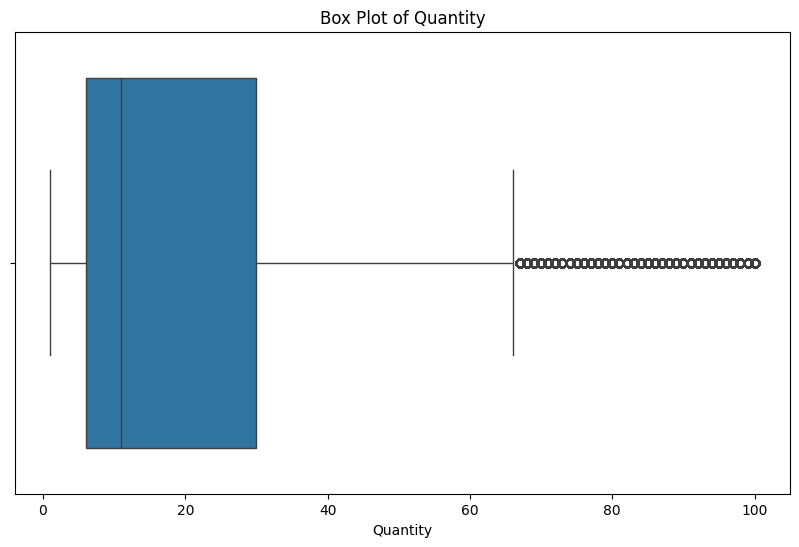

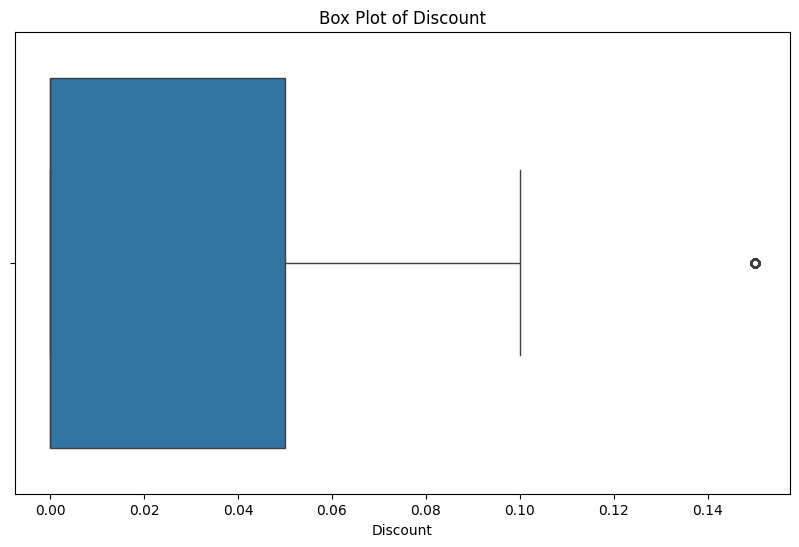

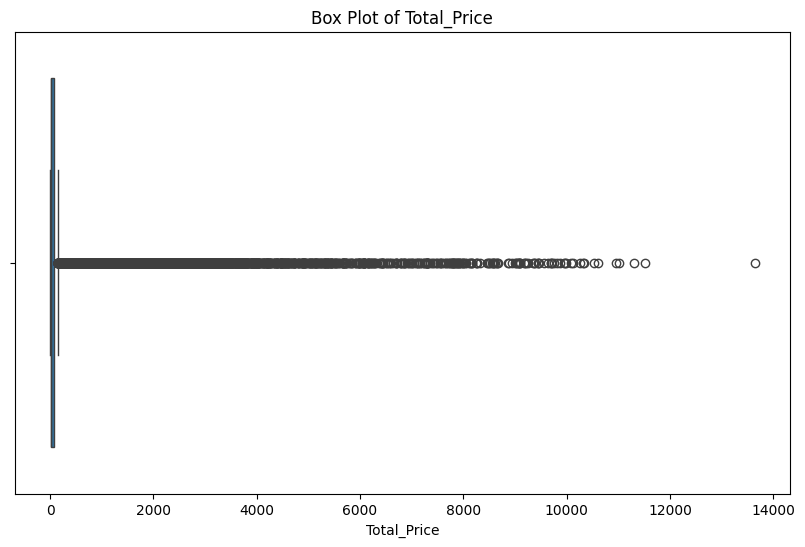

In [18]:
numeric_features = sample_data.select_dtypes(include=['number']).columns
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=sample_data[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [19]:
# Contoh sederhana untuk mengidentifikasi outliers menggunakan IQR

Q1 = sample_data[numeric_features].quantile(0.25)
Q3 = sample_data[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Filter dataframe untuk hanya menyimpan baris yang tidak mengandung outliers pada kolom numerik
condition = ~((sample_data[numeric_features] < (Q1 - 1.5 * IQR)) | (sample_data[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)
data_filtered_numeric = sample_data.loc[condition, numeric_features]

# Menggabungkan kembali dengan kolom kategorikal
# categorical_features = ['Customer_Type', 'Product', 'Category', 'Region']
categorical_features = sample_data.select_dtypes(include='object').columns.tolist()
df = pd.concat([data_filtered_numeric, sample_data.loc[condition, categorical_features]], axis=1)

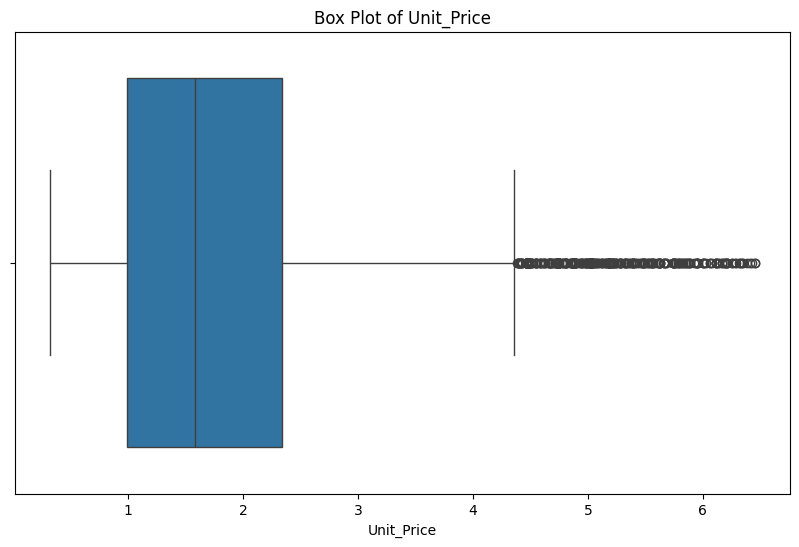

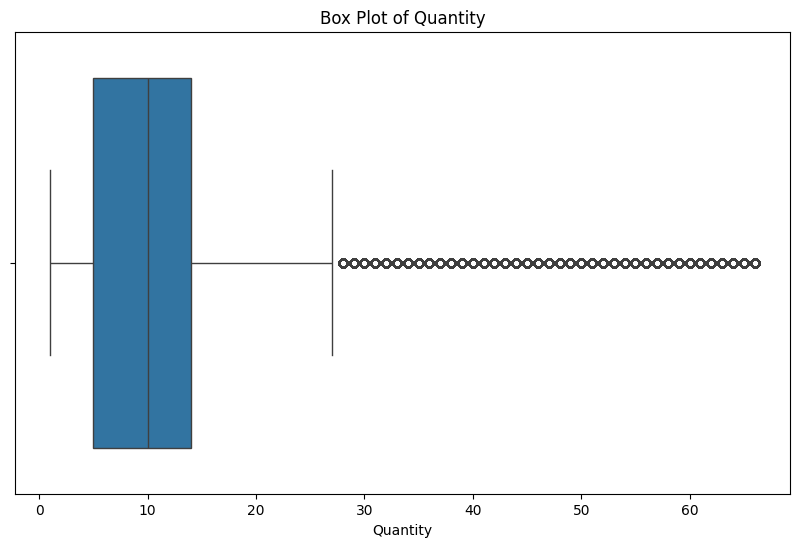

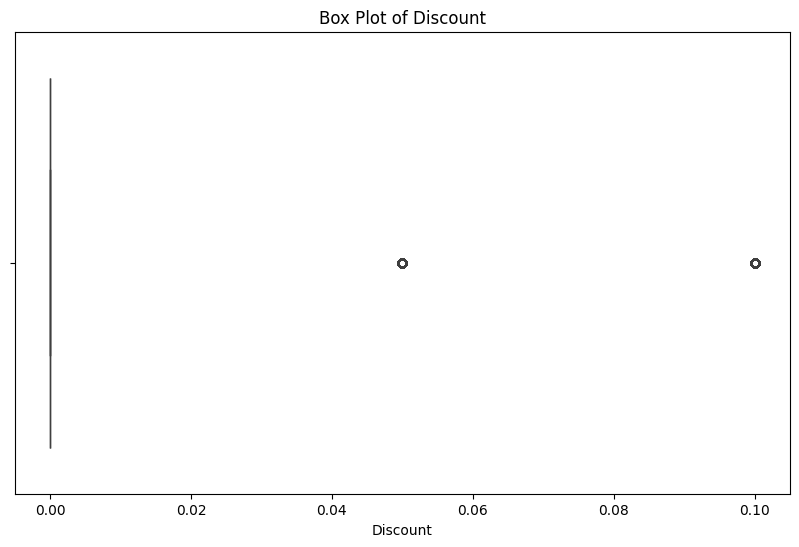

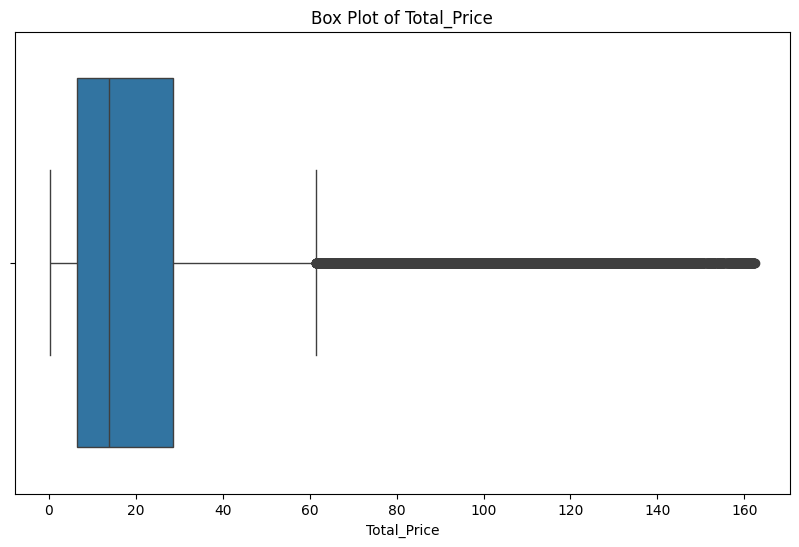

In [20]:
for feature in numeric_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [21]:
print("Data awal:", sample_data.shape)
print("Data setelah filter outlier:", df.shape)


Data awal: (100000, 11)
Data setelah filter outlier: (75563, 10)


In [22]:
print(sample_data['Discount'].value_counts())


Discount
0.00    64348
0.05    16026
0.10    15409
0.15     4217
Name: count, dtype: int64


In [23]:
from sklearn.preprocessing import RobustScaler

numerical_features = df.select_dtypes(include=['number']).columns
cat_features = df.select_dtypes(include=['object']).columns

# Hitung batas winsorize menggunakan 1.5*IQR
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Lakukan clipping
data_winsorized = df[numerical_features].clip(lower=lower_bound, upper=upper_bound, axis=1)
final_data = pd.concat([data_winsorized, df[cat_features]], axis=1)

In [24]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75563 entries, 5995542 to 3248128
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unit_Price     75563 non-null  float64
 1   Quantity       75563 non-null  float64
 2   Discount       75563 non-null  float64
 3   Total_Price    75563 non-null  float64
 4   Order_ID       75563 non-null  object 
 5   Customer_ID    75563 non-null  object 
 6   Customer_Type  75563 non-null  object 
 7   Product        75563 non-null  object 
 8   Category       75563 non-null  object 
 9   Region         75563 non-null  object 
dtypes: float64(4), object(6)
memory usage: 6.3+ MB


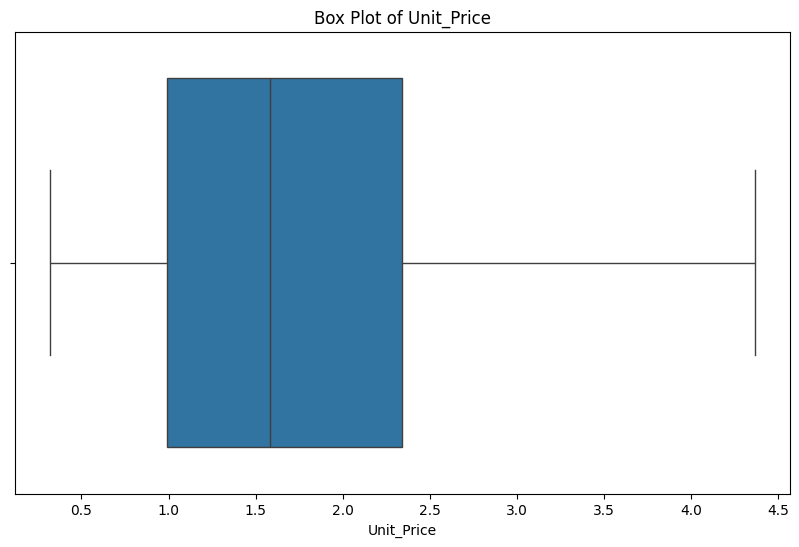

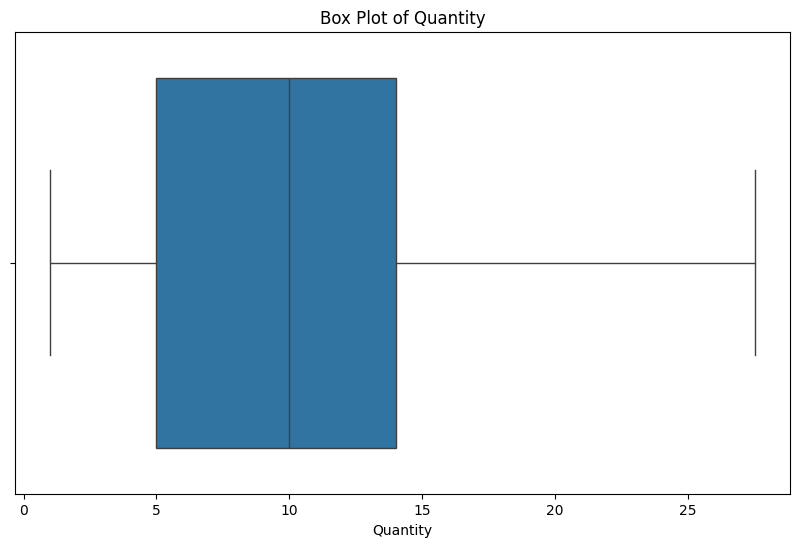

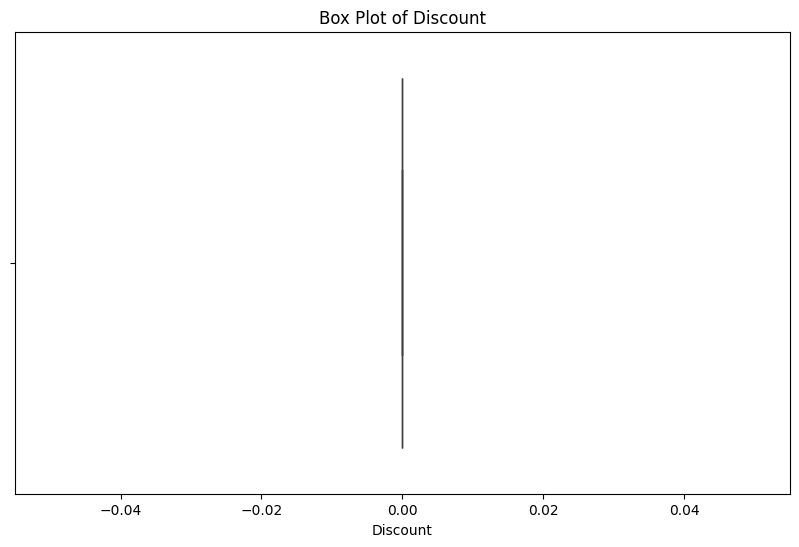

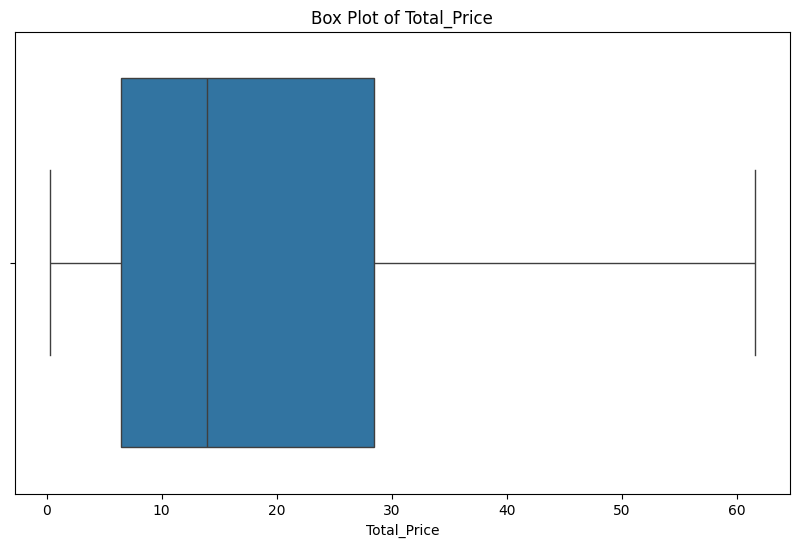

In [25]:
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data_winsorized[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler

num_features = final_data.select_dtypes(include=['number']).columns

# Standardisasi fitur numerik
scaler = MinMaxScaler()
data_standardized = final_data.copy()
data_standardized[num_features] = scaler.fit_transform(final_data[num_features])

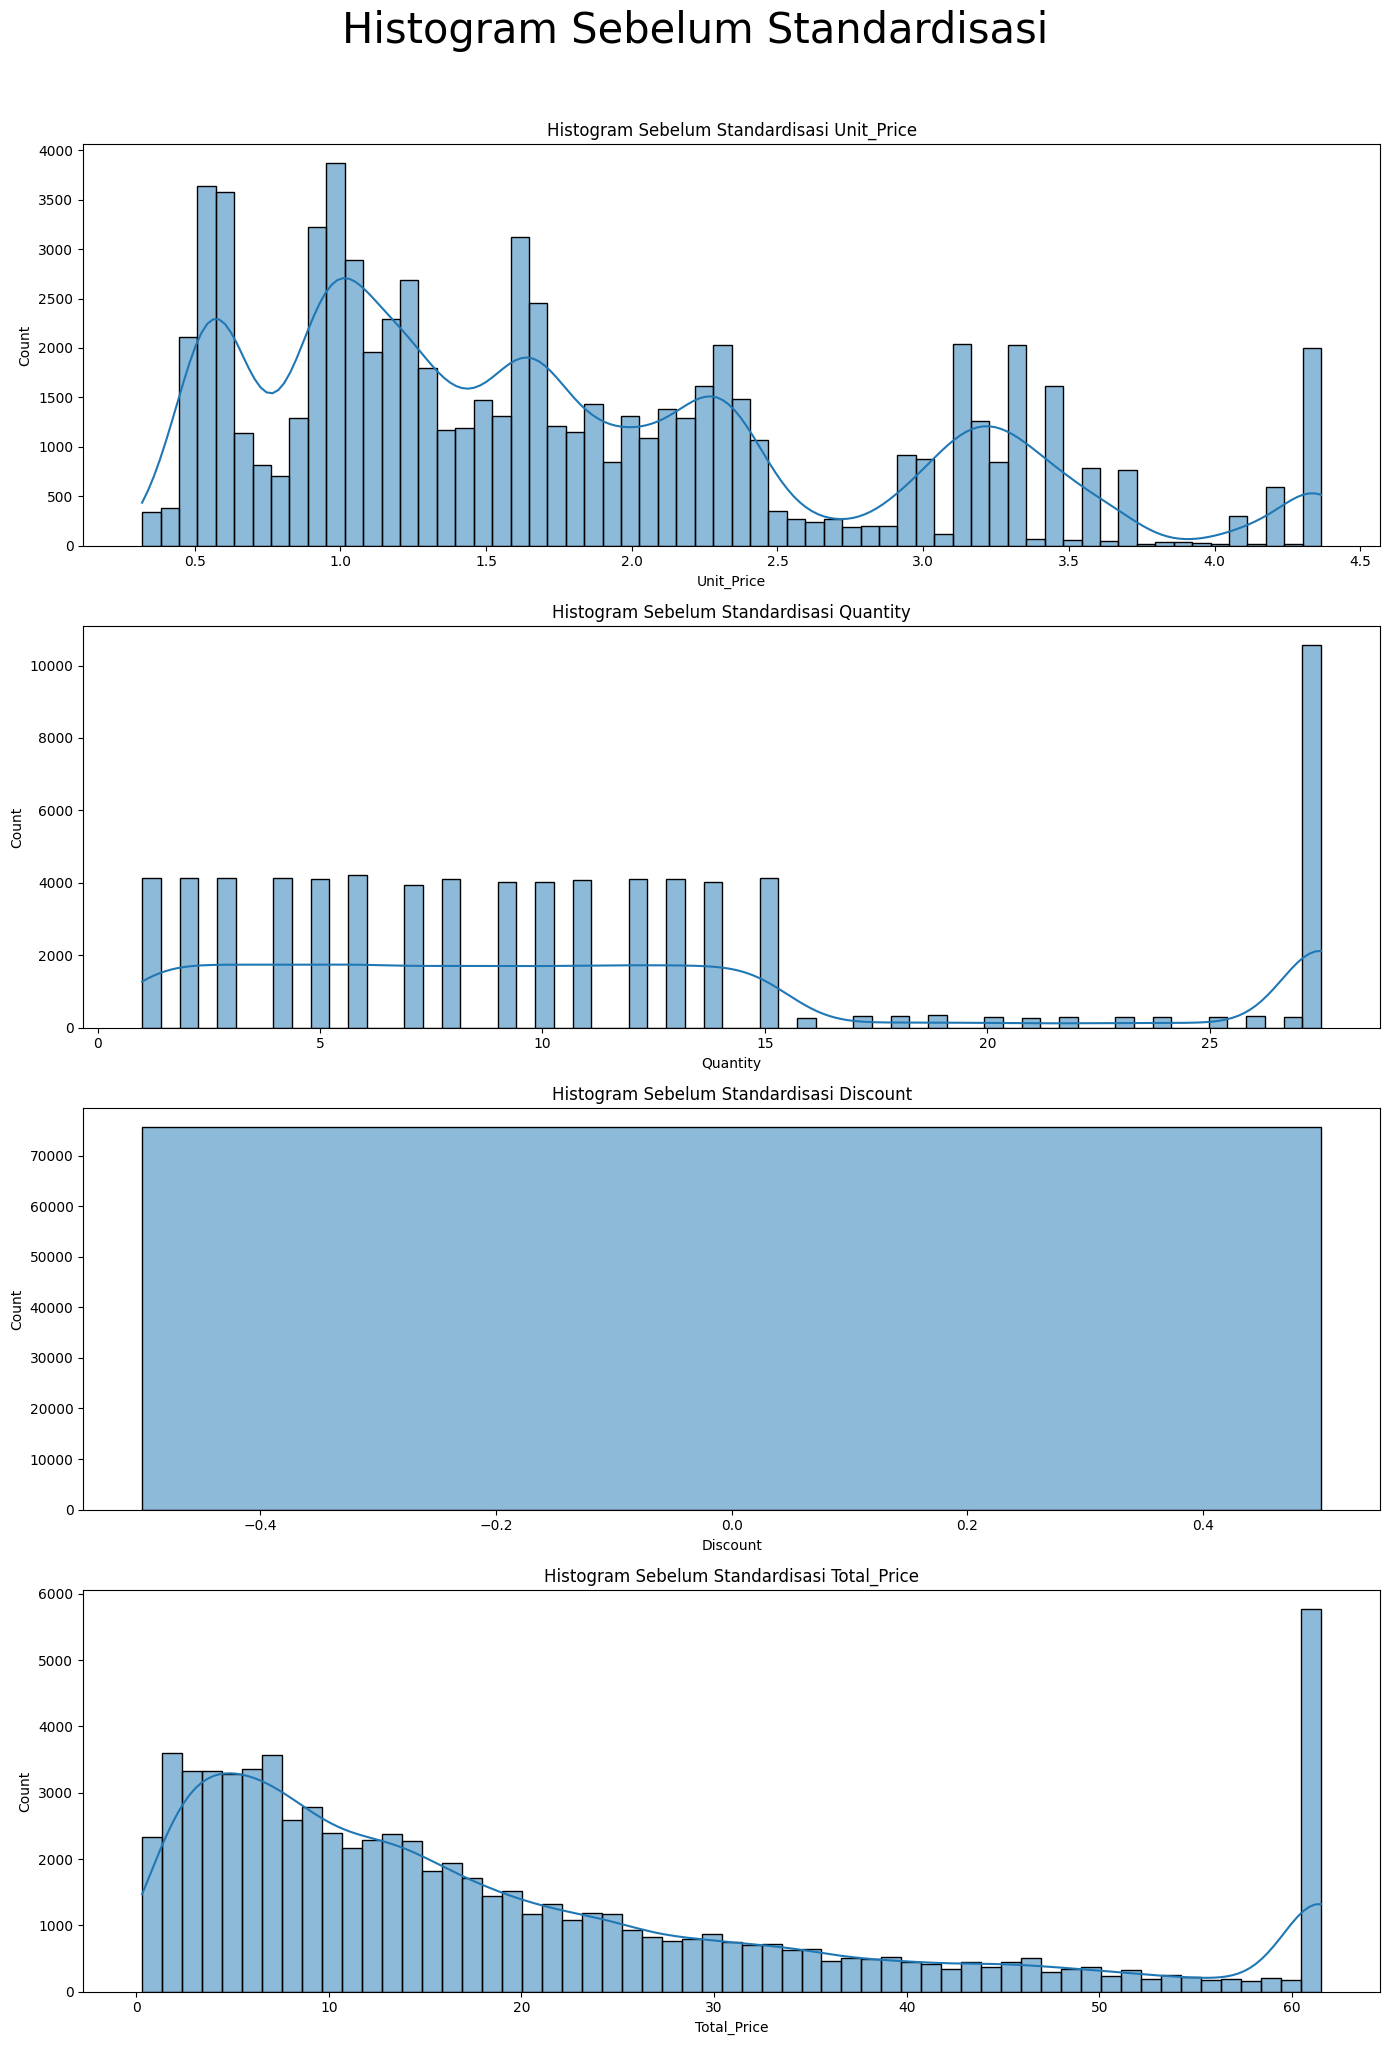

In [27]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(14, 20))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 1, i)
    sns.histplot(final_data[col], kde=True)
    plt.title(f"Histogram Sebelum Standardisasi {col}")
plt.suptitle("Histogram Sebelum Standardisasi", fontsize=30, y=1.02)
plt.tight_layout()
plt.show()

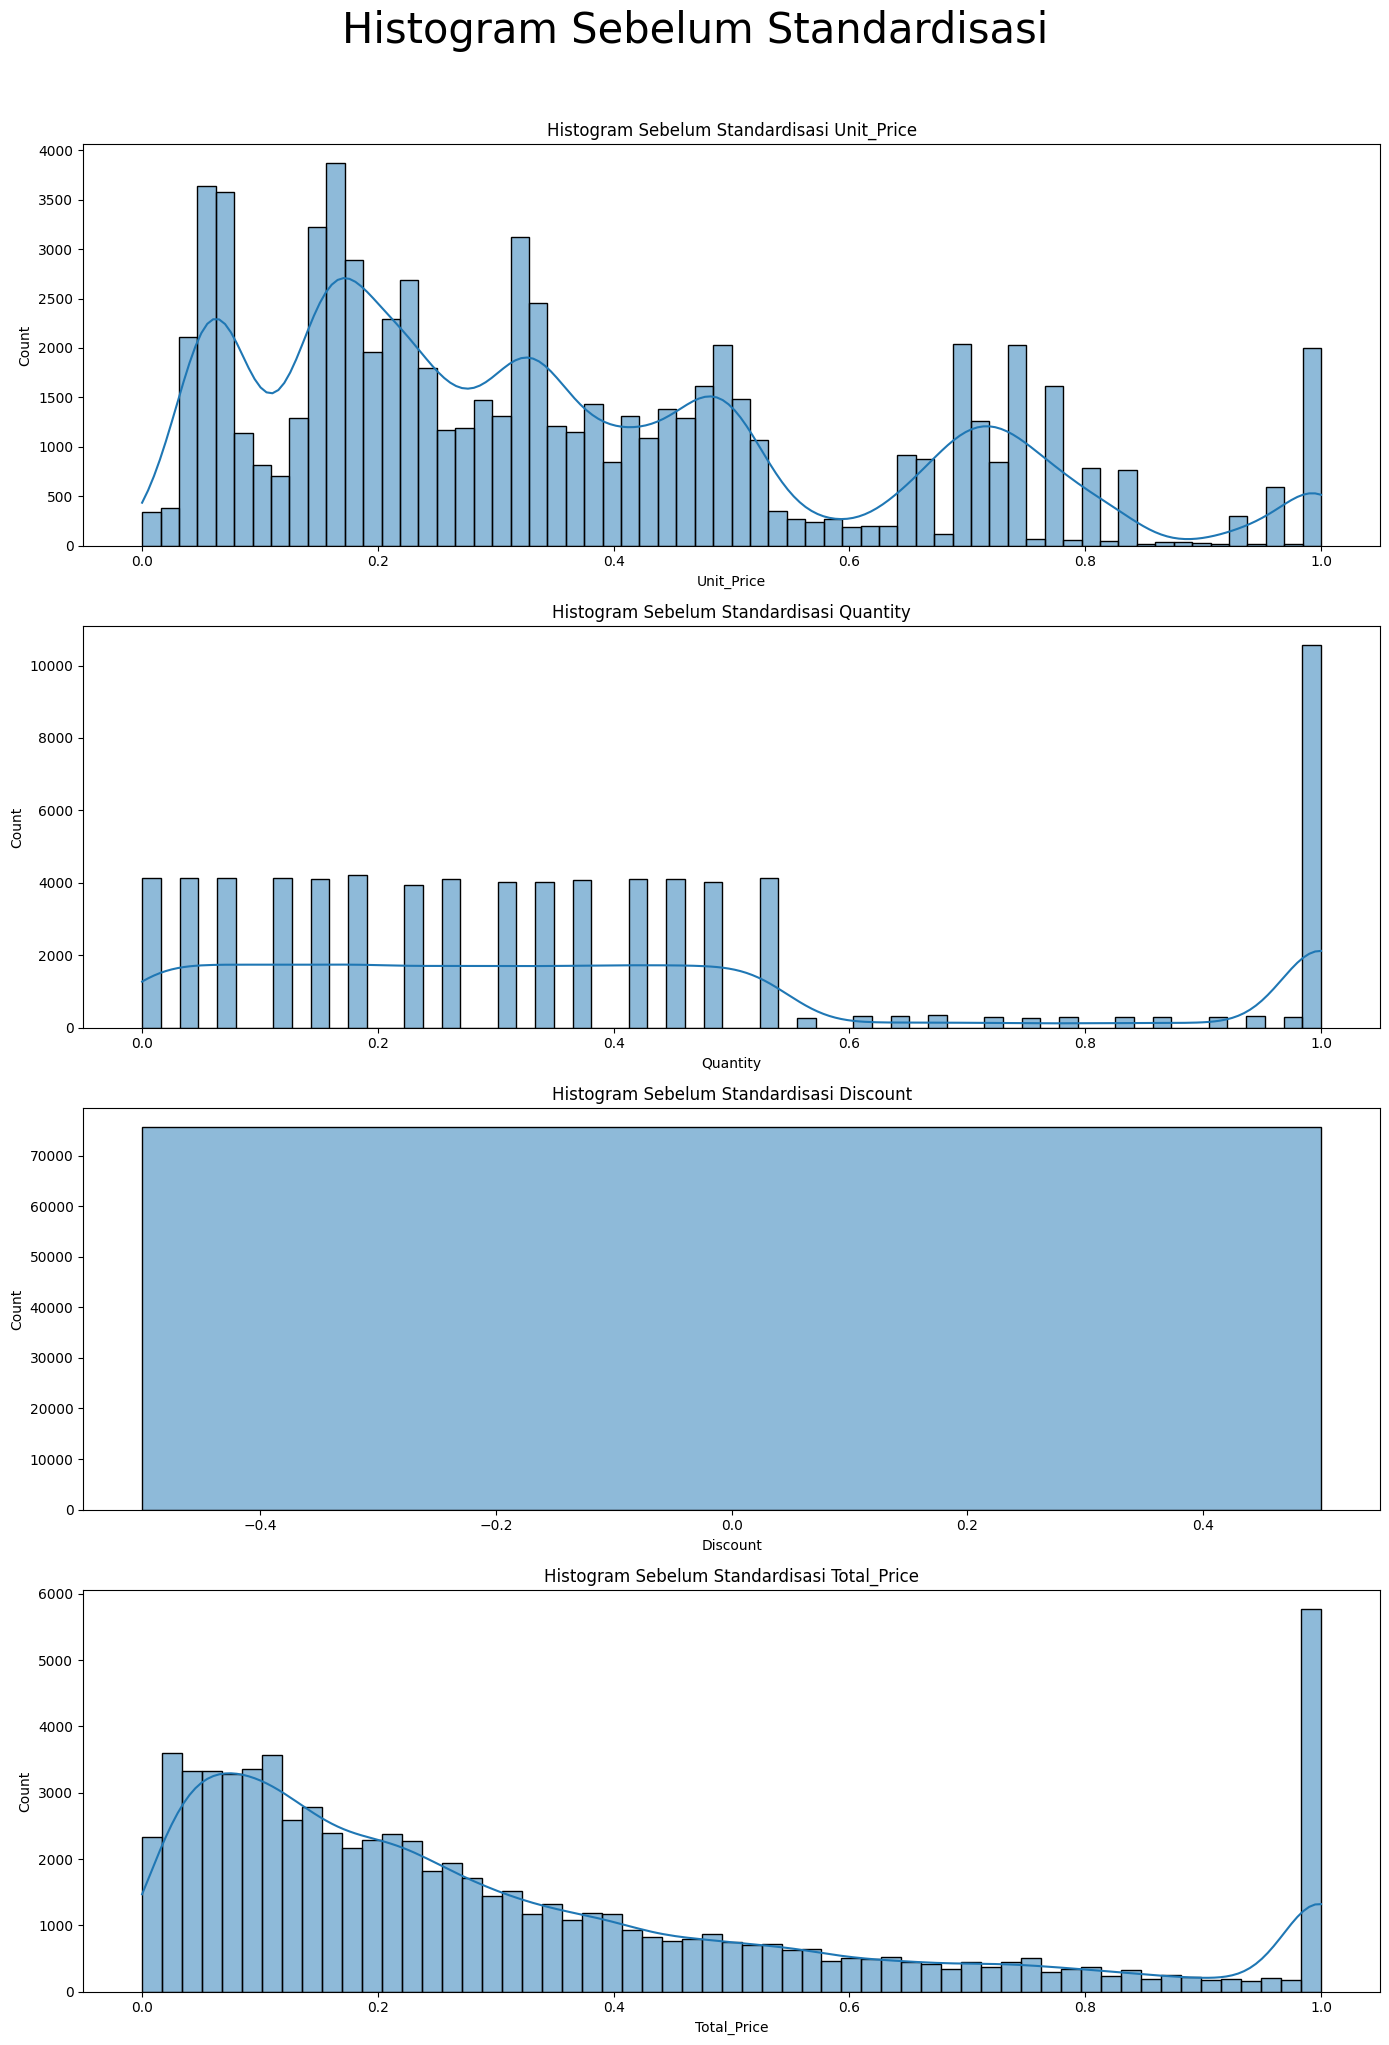

In [28]:
# Histogram Sebelum Standardisasi
plt.figure(figsize=(14, 20))
for i, col in enumerate(num_features, 1):
    plt.subplot(4, 1, i)
    sns.histplot(data_standardized[col], kde=True)
    plt.title(f"Histogram Sebelum Standardisasi {col}")
plt.suptitle("Histogram Sebelum Standardisasi", fontsize=30, y=1.02)
plt.tight_layout()
plt.show()

In [29]:
print(final_data[num_features].mean())  # Harus mendekati 0
print(final_data[num_features].std())   # Harus mendekati 1

Unit_Price      1.772951
Quantity       11.351223
Discount        0.000000
Total_Price    20.045503
dtype: float64
Unit_Price      1.017859
Quantity        8.145979
Discount        0.000000
Total_Price    17.776546
dtype: float64


In [30]:
print(data_standardized[num_features].mean())  # Harus mendekati 0
print(data_standardized[num_features].std())   # Harus mendekati 1

Unit_Price     0.359197
Quantity       0.390612
Discount       0.000000
Total_Price    0.322449
dtype: float64
Unit_Price     0.251634
Quantity       0.307395
Discount       0.000000
Total_Price    0.290443
dtype: float64


In [31]:
category_features = ['Customer_Type', 'Product', 'Category', 'Region']
data_standardized[category_features]

,Customer_Type,Product,Category,Region
5995542,B2B,Fritz-Kola,Soft Drinks,Bremen
6900691,B2C,Granini Apple,Juices,Sachsen
7916353,B2C,Pepsi,Soft Drinks,Niedersachsen
2410826,B2C,Hohes C Orange,Juices,Saarland
5008990,B2B,Vio Wasser,Water,Niedersachsen
...,...,...,...,...
1569417,B2B,Rockstar,Soft Drinks,Mecklenburg-Vorpommern
3581078,B2C,Hohes C Orange,Juices,Hessen
7925661,B2C,Schwip Schwap,Soft Drinks,Baden-Württemberg
3016981,B2C,Passion Fruit Juice,Juices,Bremen


In [32]:
from sklearn.preprocessing import LabelEncoder

# Salin dataframe agar tidak merusak data asli
data_encoded = data_standardized.copy()

# Kolom kategorikal
categorical_cols = ['Category', 'Region', 'Product', 'Customer_Type']

# Simpan encoder untuk tiap kolom
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    label_encoders[col] = le  # Simpan encoder per kolom


In [33]:
model_data = data_encoded.drop(columns=['Customer_ID', 'Order_ID'])  # ganti 'ID' dengan nama kolom sebenarnya


In [34]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75563 entries, 5995542 to 3248128
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unit_Price     75563 non-null  float64
 1   Quantity       75563 non-null  float64
 2   Discount       75563 non-null  float64
 3   Total_Price    75563 non-null  float64
 4   Customer_Type  75563 non-null  int64  
 5   Product        75563 non-null  int64  
 6   Category       75563 non-null  int64  
 7   Region         75563 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 5.2 MB


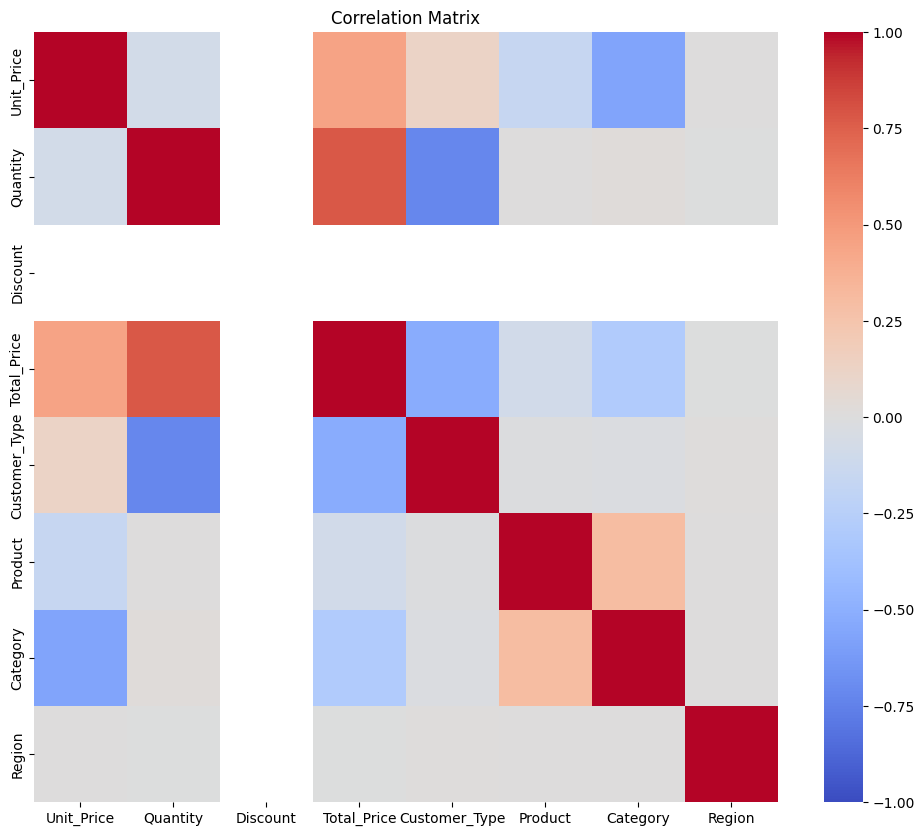

In [35]:
plt.figure(figsize=(12, 10))
correlation_matrix = model_data.corr()

sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

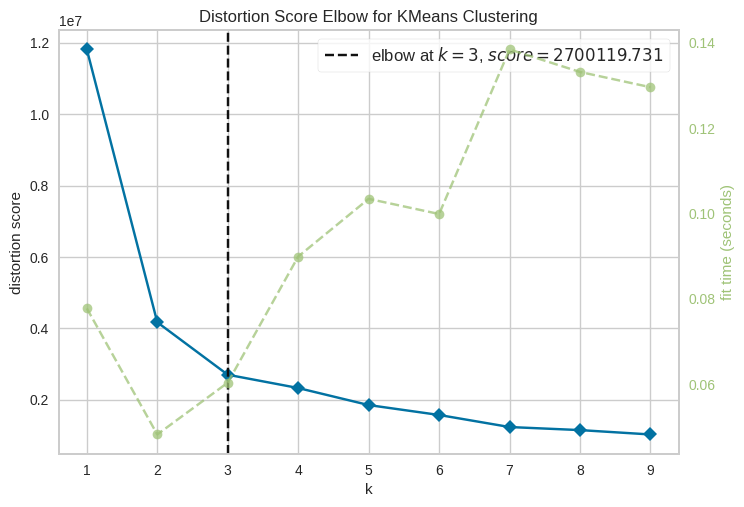

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = model_data.copy()
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(model)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [38]:
model = model_data.copy()
# Inisialisasi model dengan jumlah cluster awal (misal k=5)
kmeans_model = KMeans(n_clusters=3, random_state=42)

# Latih model pada data
kmeans_model.fit(model)

# Buat kolom baru untuk menyimpan hasil cluster
model['Cluster'] = kmeans_model.labels_

In [39]:
awal_score = silhouette_score(model.drop(columns=['Cluster']), model['Cluster'])
print(f"\nSilhouette Score untuk k = 3: {awal_score:.4f}")


Silhouette Score untuk k = 3: 0.4353


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [40]:
X = model_data.copy()

In [41]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
dummy_labels = kmeans.fit_predict(X)

In [42]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Gunakan RandomForestClassifier sebagai model dasar
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Inisialisasi RFE: misalnya ingin ambil 10 fitur terbaik
rfe = RFE(estimator=rfc, n_features_to_select=5)
rfe.fit(X, dummy_labels)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=5)

In [43]:
selected_features = X.columns[rfe.support_]
print("Fitur terpilih oleh RFE:", list(selected_features))
# Dataset baru yang hanya berisi fitur terpilih
X_selected = X[selected_features]

Fitur terpilih oleh RFE: ['Unit_Price', 'Total_Price', 'Customer_Type', 'Product', 'Category']


In [44]:
kmeans_rfe = KMeans(n_clusters=2, random_state=42)
clusters_rfe = kmeans_rfe.fit_predict(X_selected)
X_selected['Cluster'] = clusters_rfe

<ipython-input-44-696046677bc2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_selected['Cluster'] = clusters_rfe


In [45]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_selected.drop(columns='Cluster'), X_selected['Cluster'])
print("Silhouette Score setelah feature selection:", score)


Silhouette Score setelah feature selection: 0.6219312108739606


In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X_selected_no_cluster = X_selected.drop(columns='Cluster', errors='ignore')
scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_selected_no_cluster)  # X_scaled = hasil dari MinMaxScaler
    score = silhouette_score(X_selected_no_cluster, labels)
    scores.append(score)
    print(f"Cluster: {k}, Silhouette Score: {score:.4f}")


Cluster: 2, Silhouette Score: 0.6219
Cluster: 3, Silhouette Score: 0.6064
Cluster: 4, Silhouette Score: 0.5168
Cluster: 5, Silhouette Score: 0.5283


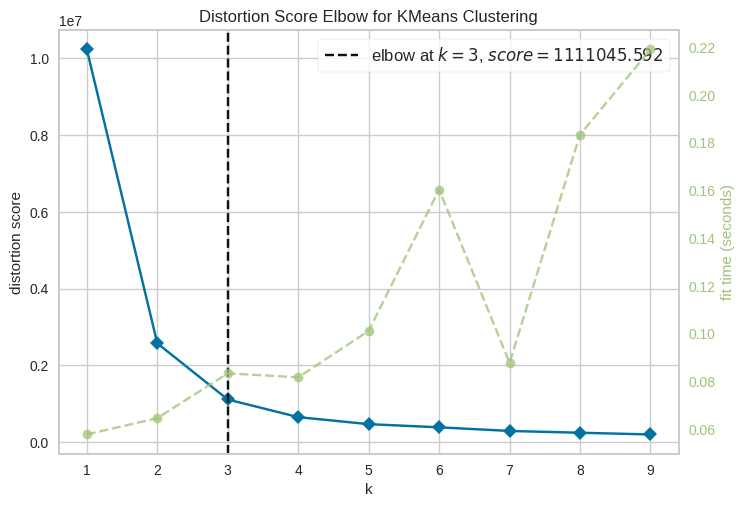

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# Inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X_selected)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [48]:
from sklearn.decomposition import PCA

# PCA akan mempertahankan 95% variansi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected_no_cluster)
centroids_2d = pca.transform(kmeans_rfe.cluster_centers_)
print("Jumlah komponen setelah PCA:", X_pca.shape[1])


Jumlah komponen setelah PCA: 2


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    scores.append(score)
    print(f"Cluster: {k}, Silhouette Score: {score:.4f}")

Cluster: 2, Silhouette Score: 0.6263
Cluster: 3, Silhouette Score: 0.6157
Cluster: 4, Silhouette Score: 0.5319
Cluster: 5, Silhouette Score: 0.5329


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Clustering Semua Fitur dengan KMeans')

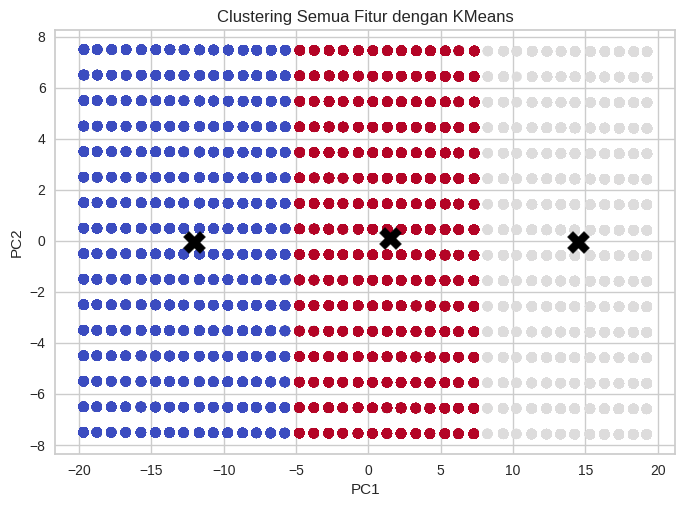

In [50]:
pca = PCA(n_components=3)
model_no_cluster = model.drop(columns='Cluster', errors='ignore')
model_pca = pca.fit_transform(model_no_cluster)
clusters = kmeans_model.fit_predict(model)
centroids = pca.transform(kmeans_model.cluster_centers_[:, :8])
plt.scatter(model_pca[:, 0], model_pca[:, 1], c=clusters, cmap='coolwarm')
plt.scatter(centroids[:, 0], centroids[:, 1], c="black", s=250, marker="X", label="Centroids")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clustering Semua Fitur dengan KMeans")

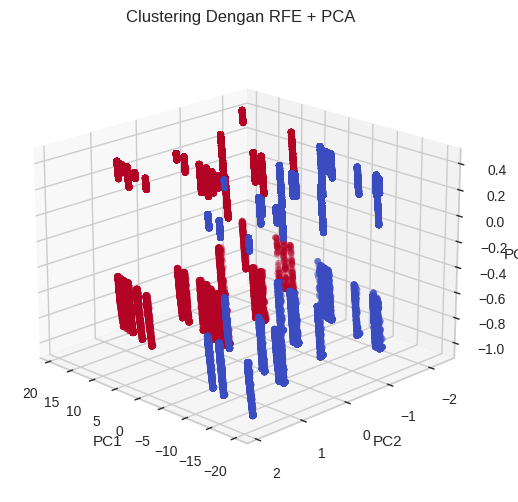

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_selected.drop(columns='Cluster'))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=clusters_rfe, cmap='coolwarm', s=20)
ax.view_init(elev=20, azim=135)
ax.set_title("Clustering Dengan RFE + PCA")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()


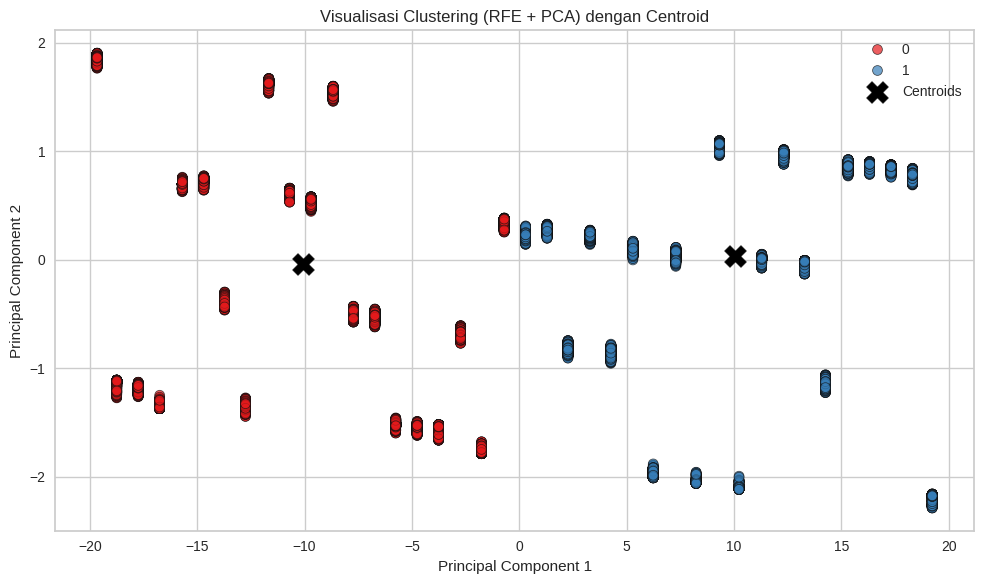

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan hasil PCA minimal ada 2 komponen untuk scatter plot 2D
if X_pca.shape[1] < 2:
    print("Komponen PCA kurang dari 2. Tidak bisa divisualisasikan dalam 2D.")
else:


    df_vis = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
    df_vis["Cluster"] = clusters_rfe.astype(str)

    # Plot scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_vis, x="PC1", y="PC2", hue="Cluster", palette='Set1', s=50, alpha=0.7, edgecolor="k")

    # Tambahkan titik centroid
    plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c="black", s=250, marker="X", label="Centroids")
    plt.title("Visualisasi Clustering (RFE + PCA) dengan Centroid")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [53]:
X_clustered = data_encoded.copy()
X_clustered['Cluster'] = kmeans_rfe.labels_

In [54]:
X_clustered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75563 entries, 5995542 to 3248128
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unit_Price     75563 non-null  float64
 1   Quantity       75563 non-null  float64
 2   Discount       75563 non-null  float64
 3   Total_Price    75563 non-null  float64
 4   Order_ID       75563 non-null  object 
 5   Customer_ID    75563 non-null  object 
 6   Customer_Type  75563 non-null  int64  
 7   Product        75563 non-null  int64  
 8   Category       75563 non-null  int64  
 9   Region         75563 non-null  int64  
 10  Cluster        75563 non-null  int32  
dtypes: float64(4), int32(1), int64(4), object(2)
memory usage: 6.6+ MB


In [55]:
# Inverse encoding untuk kolom-kolom kategorikal
for col in categorical_cols:
    if col in X_clustered.columns and col in label_encoders:
        encoded_values = X_clustered[col]
        X_clustered[col] = label_encoders[col].inverse_transform(encoded_values)

In [56]:
X_clustered.head()

,Unit_Price,Quantity,Discount,Total_Price,Order_ID,Customer_ID,Customer_Type,Product,Category,Region,Cluster
5995542,0.383189,0.641509,0.0,0.517441,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,Bremen,0
6900691,0.326329,0.113208,0.0,0.102116,ORD2300591,CUS6160,B2C,Granini Apple,Juices,Sachsen,0
7916353,0.351051,0.150943,0.0,0.137080,ORD2638652,CUS4386,B2C,Pepsi,Soft Drinks,Niedersachsen,1
2410826,0.365884,0.528302,0.0,0.436075,ORD803183,CUS7916,B2C,Hohes C Orange,Juices,Saarland,0
5008990,0.163164,0.188679,0.0,0.086267,ORD1669739,CUS3794,B2B,Vio Wasser,Water,Niedersachsen,1


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [57]:
X_clustered[num_features] = pd.DataFrame(
    scaler.inverse_transform(data_standardized[num_features]),
    columns=num_features,
    index=data_standardized.index  # penting untuk menjaga index konsisten
)

In [58]:
X_clustered.head()

,Unit_Price,Quantity,Discount,Total_Price,Order_ID,Customer_ID,Customer_Type,Product,Category,Region,Cluster
5995542,1.87,18.0,0.0,31.98,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,Bremen,0
6900691,1.64,4.0,0.0,6.56,ORD2300591,CUS6160,B2C,Granini Apple,Juices,Sachsen,0
7916353,1.74,5.0,0.0,8.70,ORD2638652,CUS4386,B2C,Pepsi,Soft Drinks,Niedersachsen,1
2410826,1.80,15.0,0.0,27.00,ORD803183,CUS7916,B2C,Hohes C Orange,Juices,Saarland,0
5008990,0.98,6.0,0.0,5.59,ORD1669739,CUS3794,B2B,Vio Wasser,Water,Niedersachsen,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [67]:
# Agregasi fitur numerik
agg_numeric = X_clustered.groupby("Cluster")[["Total_Price", "Quantity", "Unit_Price", "Discount"]].agg(["min", "max", "mean"])

# Agregasi fitur kategorikal (modus)
agg_categorical = X_clustered.groupby("Cluster")[["Category", "Customer_Type", "Region", "Product"]].agg(lambda x: x.mode().iloc[0])

# Menampilkan hasil agregasi
print("Agregasi Fitur Numerik:")
display(agg_numeric)

print("\nAgregasi Fitur Kategorikal:")
display(agg_categorical)


Agregasi Fitur Numerik:


Total_Price                    Quantity                  Unit_Price  \
                min     max       mean      min   max       mean        min   
Cluster                                                                       
0              0.31  61.515  20.916118      1.0  27.5  11.354945       0.32   
1              0.32  61.515  19.180242      1.0  27.5  11.347525       0.32   

                         Discount            
           max      mean      min  max mean  
Cluster                                      
0        4.365  1.840079      0.0  0.0  0.0  
1        4.365  1.706235      0.0  0.0  0.0


Agregasi Fitur Kategorikal:


,Category,Customer_Type,Region,Product
Cluster,,,,
0,Juices,B2C,Bremen,Hohes C Orange
1,Water,B2C,Rheinland-Pfalz,Rauch Multivitamin


In [59]:
X_clustered['Cluster'].value_counts()

,count
Cluster,
1,37898
0,37665


In [60]:
# Distribusi fitur kategorikal dalam masing-masing cluster
for col in ['Category', 'Customer_Type', 'Region', 'Product']:
    display(pd.crosstab(X_clustered['Cluster'], X_clustered[col], normalize='index') * 100)

Category,Alcoholic Beverages,Juices,Soft Drinks,Water
Cluster,,,,
0,23.687774,32.680207,24.646223,18.985796
1,6.166552,23.766426,31.914613,38.152409


Customer_Type,B2B,B2C
Cluster,,
0,24.614363,75.385637
1,25.017151,74.982849


Region,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
Cluster,,,,,,,,,,,,,,,,
0,6.069295,6.148945,5.883446,5.854241,6.910925,6.698526,5.968406,5.939201,6.523297,6.581707,6.154255,6.478163,6.520643,5.923271,6.287004,6.058675
1,6.166552,6.227242,5.902686,5.886854,6.008233,6.617763,6.100586,6.195578,6.509578,6.029342,6.813024,6.348620,6.388200,6.113779,6.464721,6.227242


Product,Apollinaris,Augustiner,Beck's,Chardonnay,Club Mate,Coca-Cola,Cranberry Juice,Erdinger Weißbier,Evian,Fanta,...,Sauvignon Blanc,Schwip Schwap,Selters,Sprite,Tomato Juice,Vio Wasser,Vittel,Volvic,Volvic Touch,Warsteiner
Cluster,,,,,,,,,,,,,,,,,,,,,
0,6.520643,2.859419,3.743528,2.453206,4.555954,4.898447,7.73928,3.047922,6.366653,5.033851,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.248034,4.459338,6.121695,5.06623,7.860573,6.417225,6.530688,6.385561,6.216687,2.93683


In [61]:
# Rata-rata nilai setiap fitur numerik per cluster
X_clustered.groupby('Cluster')[['Total_Price', 'Quantity', 'Unit_Price', 'Discount']].mean()

,Total_Price,Quantity,Unit_Price,Discount
Cluster,,,,
0,20.916118,11.354945,1.840079,0.0
1,19.180242,11.347525,1.706235,0.0


In [62]:
top_product_count = X_clustered.groupby('Cluster')['Product'].value_counts().groupby('Cluster').head(3)
print(top_product_count)

Cluster  Product            
0        Hohes C Orange         3296
         Granini Apple          3153
         Mango Juice            2945
1        Rauch Multivitamin     3032
         Passion Fruit Juice    2996
         Tomato Juice           2979
Name: count, dtype: int64


In [63]:
top_product_count = X_clustered.groupby('Cluster')['Region'].value_counts().groupby('Cluster').head(3)
print(top_product_count)

Cluster  Region             
0        Bremen                 2603
         Hamburg                2523
         Nordrhein-Westfalen    2479
1        Rheinland-Pfalz        2582
         Hamburg                2508
         Niedersachsen          2467
Name: count, dtype: int64


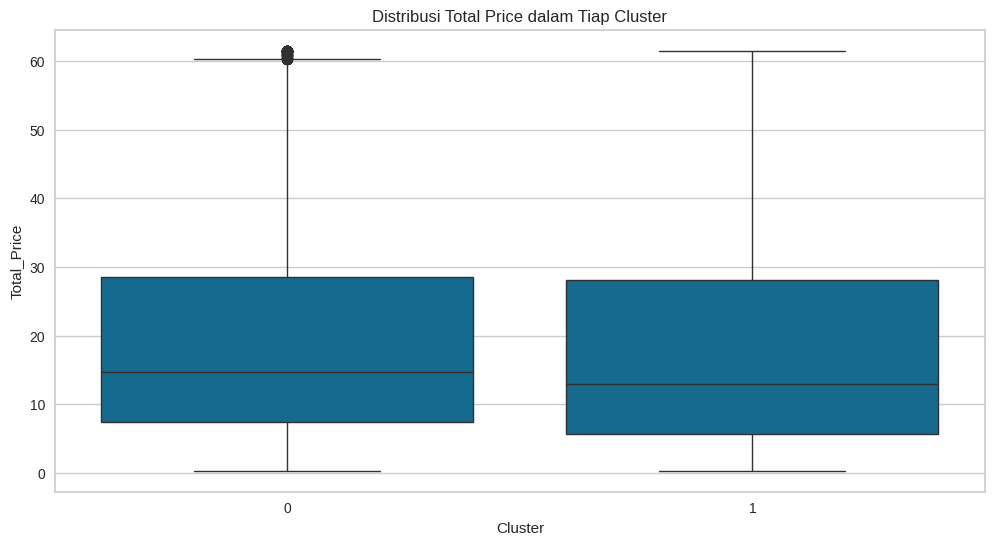

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Total_Price', data=X_clustered)
plt.title('Distribusi Total Price dalam Tiap Cluster')
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 0:

  Klaster 0 didapatkan karena:
    - Total_Price memiliki nilai rata-rata 20.92 dengan batas minimum 0.31 dan maksimum 61.52
    - Quantity memiliki nilai rata-rata 11.35 dengan batas minimum 1.0 dan maksimum 27.5,
    - Unit_Price memiliki nilai rata-rata 1.84 dengan batas minimum 0.32 dan maksimum 4.37,
    - Discount selalu bernilai 0 (tidak ada diskon),
    - Fitur kategorikal didominasi oleh:
        - Category: Juices
        - Customer_Type: B2C
        - Region: Bremen
        - Product: Hohes C Orange

  - Cluster ini terdiri dari pelanggan yang cenderung membeli produk dengan harga satuan lebih tinggi dan lebih sering membeli kategori Juices serta Alcoholic Beverages.
  - Jumlah pelanggan: 37.665
  - Rata-rata Quantity: 11.35
  - Rata-rata Total Price: 20.92
  - Rata-rata Unit Price: 1.84
  - Category yang paling sering dibeli: Juices (32.68%)
  - Produk yang paling banyak dibeli: Hohes C Orange
  - Region dengan pembelian terbanyak: Bremen
  - Cluster 0 mewakili segmen: Pelanggan retail dengan preferensi terhadap produk minuman premium seperti jus dan minuman beralkohol, yang tersebar di wilayah urban seperti Bremen dan Hamburg.
  - Analisis dan Strategi Bisnis:
Fokuskan promosi pada produk-produk Juices premium di wilayah Bremen dan Hamburg. Karena pelanggan pada cluster ini cenderung membeli dengan harga per unit lebih tinggi, strategi diskon tidak perlu terlalu massive. Sebaliknya, tonjolkan kualitas dan nilai produk. Pertimbangkan juga untuk memperluas varian jus dan minuman eksklusif. Strategi pemasaran harus fokus pada kualitas dan eksklusivitas produk, misalnya dengan iklan yang menekankan premium branding dan promosi berbasis loyalitas pelanggan.


2. Cluster 1:
  
  Klaster 1 didapatkan karena:
    - Total_Price memiliki nilai rata-rata 19.18 dengan batas minimum 0.32 dan maksimum 61.52
    - Quantity memiliki nilai rata-rata 11.35 dengan batas minimum 1.0 dan maksimum 27.5,
    - Unit_Price memiliki nilai rata-rata 1.71 dengan batas minimum 0.32 dan maksimum 4.37,
    - Discount juga selalu 0 (tidak ada diskon),
    - Fitur kategorikal didominasi oleh:
        - Category: Water
        - Customer_Type: B2C
        - Region: Rheinland-Pfalz
        - Product: Rauch Multivitamin
        
  - Cluster ini terdiri dari pelanggan yang lebih sering membeli produk dengan harga satuan lebih rendah dan dominan memilih Water dan Soft Drinks
  - Jumlah pelanggan: 37.898
  - Rata-rata Quantity: 11.35
  - Rata-rata Total Price: 19.18
  - Rata-rata Unit Price: 1.71
  - Category yang paling sering dibeli: Water (38.15%)
  - Produk yang paling banyak dibeli: Rauch Multivitamin
  - Region dengan pembelian terbanyak: Rheinland-Pfalz
  - Cluster 1 mewakili segmen: Pelanggan dengan fokus pada kebutuhan minuman sehari-hari seperti air dan soft drinks, tersebar di wilayah sub-urban atau semi-urban.
  - Analisis dan Strategi Bisnis:
Tingkatkan promosi bundling untuk produk air dan soft drinks di wilayah seperti Rheinland-Pfalz dan Niedersachsen. Karena harga per unit lebih rendah, strategi upselling seperti paket hemat atau kupon pembelian berulang bisa meningkatkan volume pembelian. Tambahkan produk baru yang sesuai dengan kebutuhan harian dan mudah dijangkau oleh pelanggan dengan harga sensitif. Lebih efektif menggunakan strategi harga dan promosi volume, seperti diskon bundling, paket hemat, dan penawaran kupon untuk meningkatkan jumlah pembelian.

Perbedaan kedua cluster ini lebih kepada pola konsumsi, preferensi harga, dan demografi pelanggan

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 1:
- **Rata-rata Annual Income (k$):** 48,260  
- **Rata-rata Spending Score (1-100):** 56.48  
- **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan menengah dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang moderat dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka.

## Cluster 2:
- **Rata-rata Annual Income (k$):** 86,540  
- **Rata-rata Spending Score (1-100):** 82.13  
- **Analisis:** Cluster ini menunjukkan pelanggan dengan pendapatan tahunan tinggi dan pengeluaran yang sangat tinggi. Pelanggan di cluster ini merupakan kelompok premium dengan daya beli yang kuat dan cenderung mengeluarkan uang dalam jumlah besar untuk produk atau layanan.

## Cluster 3:
- **Rata-rata Annual Income (k$):** 87,000  
- **Rata-rata Spending Score (1-100):** 18.63  
- **Analisis:** Cluster ini terdiri dari pelanggan dengan pendapatan tahunan yang tinggi tetapi pengeluaran yang rendah. Mereka mungkin memiliki kapasitas finansial yang baik namun tidak terlalu aktif dalam berbelanja. Ini bisa menunjukkan bahwa mereka lebih selektif dalam pengeluaran mereka atau mungkin lebih cenderung untuk menyimpan uang.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [65]:
X_clustered.to_csv('clustering.csv', index=False)

In [66]:
from google.colab import files
files.download('clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>